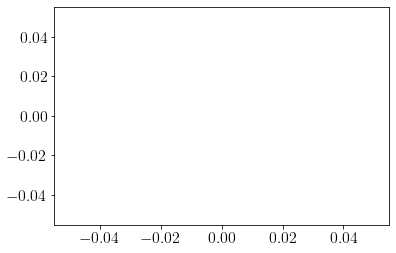

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt

import econtools
from econtools.documents import Homework, RawLatex
from utils import FoodStamps, PublicSchool, CobbDouglasDeflator
from utils import cbeq, polyeq, term, is_divisible, Number

rng = np.random.default_rng(100)

plt.plot()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)

filename = "econ-310-hw08"

doc = Homework(
    title = r"Econ 310 Week 8 Homework",
    due_date = r"Tuesday 10/22"
)


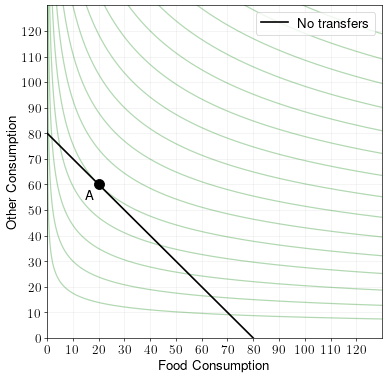

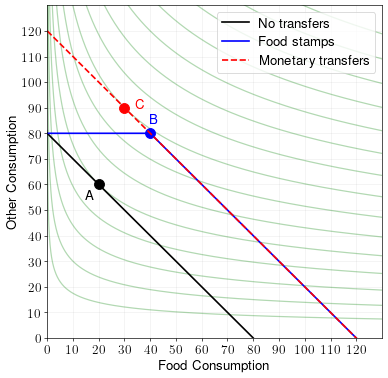

In [2]:
df = pd.read_csv("FoodStamps_examples.csv")
found = False
while (not found):
    params = dict(
        df.loc[df['corner']].sample(1,random_state=rng).reset_index(drop=True).loc[0]
    )
    prob = FoodStamps(params)
    x = prob.cb_base.sol['x']
    y = prob.cb_base.sol['y']
    if (x+y >= 6*params['gmax']/12) and params['corner']:
        found = True
prob.graph_with_IC(base=True, inkind=False, tfr=False, show=True, saveas="tex/hw08_foodstamps_1.png")
prob.graph_with_IC(base=True, inkind=True, tfr=True, show=True, saveas=None)

inkind_tfr = params['val']/params['px']

question = fr"""
The diagram below illustrates a consumer's optimal choice between food consumption and 
numeraire consumption (i.e. consumption on other goods).

\begin{{center}}
\includegraphics[width=3in]{{hw08_foodstamps_1.png}}
\end{{center}}

\begin{{enumerate}}[a.]
\item Suppose the consumer receives a direct transfer of {inkind_tfr:.0f} units of food. Draw the new budget constraint
and label the optimal consumption bundle B.
\item Suppose instead that the consumer receives a direct monetary transfer worth {inkind_tfr:.0f} units of food. 
Draw the new budget constraint and label the optimal consumption bundle C.
\item Which offers higher utility: the in-kind transfer or the direct monetary transfer of equal value?
\end{{enumerate}}
"""
latex = "\\begin{q}\n" + question + "\\end{q}\n"
doc.add(RawLatex(latex))

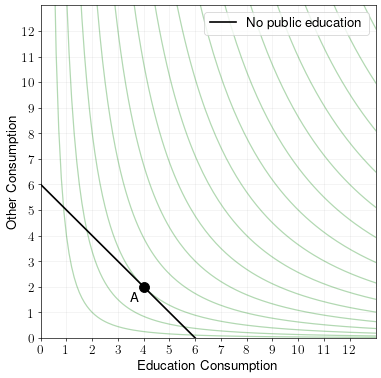

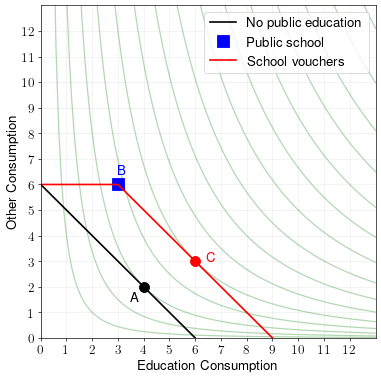

In [3]:
df = pd.read_csv("PublicSchool_examples.csv")
found = False
while (not found):
    params = dict(
        df.loc[
            (df['U_public'] > df['U_base'])
        ].sample(1,random_state=rng).reset_index(drop=True).loc[0]
    )
    prob = PublicSchool(params)
    x_private = prob.cb_base.sol['x']
    x_public = prob.sol['x_public']
    if x_private > x_public:
        found = True
prob.graph_with_IC(base=True, public=False, voucher=False, show=True, saveas="tex/hw08_publicschool_1.png")
prob.graph_with_IC(base=True, public=True, voucher=True, show=True, saveas=None)

inkind_tfr = params['val']/params['px']

question = fr"""
The diagram below illustrates a family's optimal choice between education consumption and 
numeraire consumption (i.e. consumption on other goods), when only private school options are available.

\begin{{center}}
\includegraphics[width=3in]{{hw08_publicschool_1.png}}
\end{{center}}

\begin{{enumerate}}[a.]
\item Suppose there is a public school that provides {inkind_tfr:.0f} units of education for free. Label the point
on the diagram that illustrates the public school option. Will the family choose the public school option or continue 
paying for the private school? Label the optimal consumption bundle B. Does the introduction of the public school option
increase or lower the equilibrium education consumption?

\item Suppose instead that the family is provided a voucher worth the monetary value of {inkind_tfr:.0f} units of 
private education. The voucher can only be spent on education. Draw the budget constraint with the voucher and label 
the optimal consumption C. Does the introduction of the voucher increase or lower the equilibrium education consumption?

\item Which offers higher utility: the public school option or the voucher?
\end{{enumerate}}
"""
latex = "\\begin{q}\n" + question + "\\end{q}\n"
doc.add(RawLatex(latex))


In [4]:
question = fr"""
Draw an example where the introduction of a public school option \emph{{increases}} the amount of education consumed.
"""
latex = "\\begin{q}\n" + question + "\\end{q}\n"
doc.add(RawLatex(latex))


In [5]:
question = fr"""
Draw an example where the introduction of a public school option is not utilized, i.e. the family continues to
choose private school even though a free public option is available.
"""
latex = "\\begin{q}\n" + question + "\\end{q}\n"
doc.add(RawLatex(latex))


In [6]:
df = pd.read_csv("CobbDouglasDeflator_examples.csv")
params = dict(
    df.loc[df['CPI']==125].sample(1,random_state=rng).reset_index(drop=True).loc[0]
)
prob = CobbDouglasDeflator(params)
setup = prob.setup()
question = fr"""
\begin{{enumerate}}[a.]
\item Find the optimal consumption bundle in the base period and calculate utility.
\item Calculate the CPI in the comparison period relative to the base period.
\item Calculate the optimal consumption bundle in the comparison period and calculate utility.
\item How much income would be required in the comparison period to achieve the same utility as in the base period?
\item Does the CPI underestimate or overestimate the welfare impact of the price change?
\end{{enumerate}}
"""
latex = "\\begin{q}\n" + setup + question + "\\end{q}\n"
doc.add(RawLatex(latex))


In [7]:
doc.print_pdf(filename, "tex")